# PROBLEM STATEMENT 

#                                Taxi Fare Prediction
   
Abstract: In the last few years, the number of for-hire vehicles(renting a car) operating in NY has grown from 63,000 to more than 100,000. However, while the number of trips in app-based vehicles has increased from 6 million to 17 million a year, taxi trips have fallen from 11 million to 8.5 million. Hence, the NY Yellow Cab organization decided to become more data-centric. Then we have apps like Uber, OLA, Lyft, Gett, etc. how do these apps work? After all, that set price is not a random guess.

# IMPORTING THE NECESSARY LIBRARIES 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn import metrics

# LOADING THE DATASET 

In [2]:
df=pd.read_csv('E:\Python Imarticus\Taxi Fare Prediction\Dataset\TaxiFare.csv')

#Checking the first five rows of the dataset

In [3]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
#Checking the last five rows of the dataset
df.tail()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2
49999,13:14.0,10.9,2010-01-13 08:13:14 UTC,-73.932603,40.763805,-73.932603,40.763805,1


In [5]:
# Checking the information of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [6]:
#Check the description of the Dataset
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734371,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [7]:
# Checking the columns of the dataset whether they have proper datatype or not
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [8]:
# Checking the datatype of the date_time_of_pickup column
df['date_time_of_pickup'].dtypes

dtype('O')

In [9]:
# Converting date_time_of_pickup column of object to datetime  
df['date_time_of_pickup']=pd.to_datetime(df['date_time_of_pickup'])

In [10]:
# Checking some values of the date_time_of_pickup columns
df['date_time_of_pickup'].head()

0   2009-06-15 17:26:21+00:00
1   2010-01-05 16:52:16+00:00
2   2011-08-18 00:35:00+00:00
3   2012-04-21 04:30:42+00:00
4   2010-03-09 07:51:00+00:00
Name: date_time_of_pickup, dtype: datetime64[ns, UTC]

In [11]:
# Making a copy of the Original Dataset and storing it into a new DataFrame
df_1=df.copy()

In [12]:
# Extracting Year,Month,Day,Week_day from the date_time_of_pickup
df_1['Year']=df_1['date_time_of_pickup'].dt.year
df_1['Month']=df_1['date_time_of_pickup'].dt.month
df_1['Day']=df_1['date_time_of_pickup'].dt.day
df_1['Week_day']=df_1['date_time_of_pickup'].dt.weekday

In [13]:
# Extracting Hours,Minute from the date_time_of_pickup
import datetime
df_1['Hours']=df_1['date_time_of_pickup'].dt.hour
#df_1['Minute']=df_1['date_time_of_pickup'].dt.minute

In [14]:
# Checking if the changes that we have done in the code is reflected or not 
df_1.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Year,Month,Day,Week_day,Hours
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7


In [15]:
# Renaming some columns of the dataset to be more readable format
df_1.rename(columns={'amount':'Fare','longitude_of_pickup':'pickup_longitude',
                    'latitude_of_pickup':'pickup_latitude','longitude_of_dropoff':'dropoff_longitude',
                    'latitude_of_dropoff':'dropoff_latitude','no_of_passenger':'PassengerInTaxi'},inplace=True)

In [16]:
df_1

,unique_id,Fare,date_time_of_pickup,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,PassengerInTaxi,Year,Month,Day,Week_day,Hours
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15+00:00,-73.999973,40.748531,-74.016899,40.705993,1,2013,6,12,2,23
49996,19:18.0,7.5,2015-06-22 17:19:18+00:00,-73.984756,40.768211,-73.987366,40.760597,1,2015,6,22,0,17
49997,53:00.0,6.9,2011-01-30 04:53:00+00:00,-74.002698,40.739428,-73.998108,40.759483,1,2011,1,30,6,4
49998,09:00.0,4.5,2012-11-06 07:09:00+00:00,-73.946062,40.777567,-73.953450,40.779687,2,2012,11,6,1,7


In [17]:
# Checking some Anomalies in the Dataset and investigate if the situation is valid or not
df_1[df_1['Fare']==0]

,unique_id,Fare,date_time_of_pickup,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,PassengerInTaxi,Year,Month,Day,Week_day,Hours
10002,26:01.0,0.0,2010-02-15 14:26:01+00:00,-73.987115,40.738808,-74.005911,40.713960,1,2010,2,15,0,14
27891,40:28.0,0.0,2015-05-15 21:40:28+00:00,-74.077927,40.805714,-74.077919,40.805721,1,2015,5,15,4,21
47302,13:39.0,0.0,2010-03-18 19:13:39+00:00,-73.942346,40.806269,-73.942463,40.806129,1,2010,3,18,3,19


We can see that there are some Fare price which are zero but the PassengerinTaxi is 1 maybe this 
is a bad data or any other reason but for now we are just focusing on Predicting Taxi Fare so we will
eliminate this rows

In [18]:
# Eliminate the invalid and bad data of the dataset
#df_1.drop(index=[10002,27891,47302],inplace=True)

In [19]:
#Check if the condition is applied or not
df_1[df_1['Fare']==0]

,unique_id,Fare,date_time_of_pickup,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,PassengerInTaxi,Year,Month,Day,Week_day,Hours
10002,26:01.0,0.0,2010-02-15 14:26:01+00:00,-73.987115,40.738808,-74.005911,40.713960,1,2010,2,15,0,14
27891,40:28.0,0.0,2015-05-15 21:40:28+00:00,-74.077927,40.805714,-74.077919,40.805721,1,2015,5,15,4,21
47302,13:39.0,0.0,2010-03-18 19:13:39+00:00,-73.942346,40.806269,-73.942463,40.806129,1,2010,3,18,3,19


The condition is applied sucessfully and we will see whether there is some more anomalies so that when we start our model building process it should have good data

# MORE ANOMALIES IN THE DATASET

In [20]:
df_1.dtypes

unique_id                           object
Fare                               float64
date_time_of_pickup    datetime64[ns, UTC]
pickup_longitude                   float64
pickup_latitude                    float64
dropoff_longitude                  float64
dropoff_latitude                   float64
PassengerInTaxi                      int64
Year                                 int64
Month                                int64
Day                                  int64
Week_day                             int64
Hours                                int64
dtype: object

In [21]:
df_1['Fare'].dtypes

dtype('float64')

In [22]:
df_1[df_1['Fare']<0]

,unique_id,Fare,date_time_of_pickup,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,PassengerInTaxi,Year,Month,Day,Week_day,Hours
2039,37:10.0,-2.9,2010-03-09 23:37:10+00:00,-73.789450,40.643498,-73.788665,40.641952,1,2010,3,9,1,23
2486,14:27.0,-2.5,2015-03-22 05:14:27+00:00,-74.000031,40.720631,-73.999809,40.720539,1,2015,3,22,6,5
13032,57:10.0,-3.0,2013-08-30 08:57:10+00:00,-73.995062,40.740755,-73.995885,40.741357,4,2013,8,30,4,8
28839,39:10.0,-2.5,2013-08-11 13:39:10+00:00,-73.785260,40.648442,0.000000,0.000000,1,2013,8,11,6,13
36722,19:45.0,-2.5,2015-04-30 15:19:45+00:00,-73.952187,40.790112,-73.950043,40.792839,1,2015,4,30,3,15
42337,29:46.0,-5.0,2015-03-09 10:29:46+00:00,-73.990974,40.755985,-73.980820,40.759869,1,2015,3,9,0,10


We can see that there are five records where Fare is less than 0 which is invalid so  we need to 
eliminate the records

In [23]:
#df_1.drop(index=[2039,2486,13032,28839,36722,42337],inplace=True)

In [24]:
# The condition is applied sucessfully and now we have no Fare Price Less than 0
df_1[df_1['Fare']<0]

,unique_id,Fare,date_time_of_pickup,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,PassengerInTaxi,Year,Month,Day,Week_day,Hours
2039,37:10.0,-2.9,2010-03-09 23:37:10+00:00,-73.789450,40.643498,-73.788665,40.641952,1,2010,3,9,1,23
2486,14:27.0,-2.5,2015-03-22 05:14:27+00:00,-74.000031,40.720631,-73.999809,40.720539,1,2015,3,22,6,5
13032,57:10.0,-3.0,2013-08-30 08:57:10+00:00,-73.995062,40.740755,-73.995885,40.741357,4,2013,8,30,4,8
28839,39:10.0,-2.5,2013-08-11 13:39:10+00:00,-73.785260,40.648442,0.000000,0.000000,1,2013,8,11,6,13
36722,19:45.0,-2.5,2015-04-30 15:19:45+00:00,-73.952187,40.790112,-73.950043,40.792839,1,2015,4,30,3,15
42337,29:46.0,-5.0,2015-03-09 10:29:46+00:00,-73.990974,40.755985,-73.980820,40.759869,1,2015,3,9,0,10


# NOW DOING EXPLORATORY DATA ANALYSIS

In [25]:
# Check if the dataset has missing value or not
df_1.isnull().sum()

unique_id              0
Fare                   0
date_time_of_pickup    0
pickup_longitude       0
pickup_latitude        0
dropoff_longitude      0
dropoff_latitude       0
PassengerInTaxi        0
Year                   0
Month                  0
Day                    0
Week_day               0
Hours                  0
dtype: int64

The Target Columns are Fare,Pickup_longitude,pickup_latitude,dropoff_latitude,dropoff_longitude and etc need to be explored

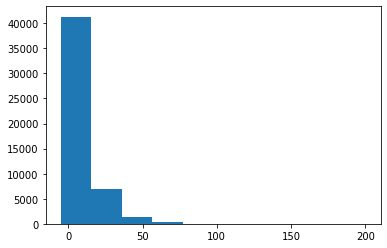

In [26]:
# Checking the histogram of the Fare Columns
plt.hist(df_1['Fare'])
plt.show()

We can see that the (Dependent Variable) Fare Distribution is Right Skewed which is obvious because
of the kind of pickup_location,drop_location and many others thing are considered 
while it is predicted

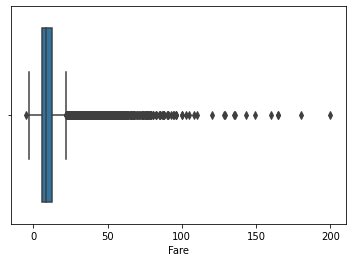

In [27]:
#Checking If the Fare has outlier as it is right skewed so there will some values which will be
#influencing it using seaborn boxplot
sns.boxplot(x=df_1['Fare'])
plt.show()

In [28]:
# Checking IQR(InterQuartile Range)
Q1=df_1['Fare'].quantile(0.25)
Q3=df_1['Fare'].quantile(0.75)
IQR=Q3-Q1
print('The Inter Quartile Range of the Fare column:',IQR)

The Inter Quartile Range of the Fare column: 6.5


In [29]:
# Check lower_value and higher_value
lower_whisker=Q1-1.5*IQR
higher_whisker=Q3+1.5*IQR
print('The lower whisker value:',lower_whisker)
print('The higher whisker value:',higher_whisker)

The lower whisker value: -3.75
The higher whisker value: 22.25


In [30]:
# Checking lower_extreme and higher_extreme greater than 3 standard deviation
lower_extreme=df_1['Fare'].mean()-3*df_1['Fare'].std()
higher_extreme=df_1['Fare'].mean()+3*df_1['Fare'].std()
print('The lower extreme value :',lower_extreme)
print('The higher extreme value :',higher_extreme)

The lower extreme value : -17.692500973638843
The higher extreme value : 40.42084377363885


In [31]:
df_1.dtypes

unique_id                           object
Fare                               float64
date_time_of_pickup    datetime64[ns, UTC]
pickup_longitude                   float64
pickup_latitude                    float64
dropoff_longitude                  float64
dropoff_latitude                   float64
PassengerInTaxi                      int64
Year                                 int64
Month                                int64
Day                                  int64
Week_day                             int64
Hours                                int64
dtype: object

In [32]:
df_1.head()

,unique_id,Fare,date_time_of_pickup,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,PassengerInTaxi,Year,Month,Day,Week_day,Hours
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7


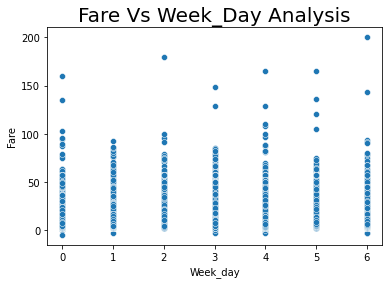

In [33]:
# Checking the relation of Fare vs Week_day
sns.scatterplot(x=df_1['Week_day'],y=df_1['Fare'])
plt.title('Fare Vs Week_Day Analysis',size=20)
plt.show()

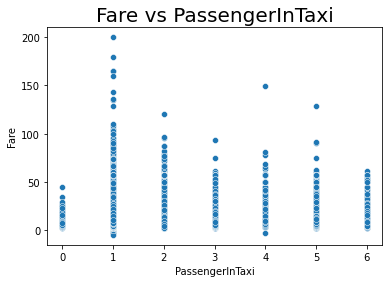

In [34]:
sns.scatterplot(x=df_1['PassengerInTaxi'],y=df_1['Fare'])
plt.title('Fare vs PassengerInTaxi',size=20)
plt.show()

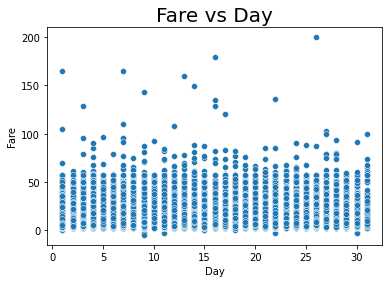

In [35]:
sns.scatterplot(x=df_1['Day'],y=df_1['Fare'])
plt.title('Fare vs Day',size=20)
plt.show()

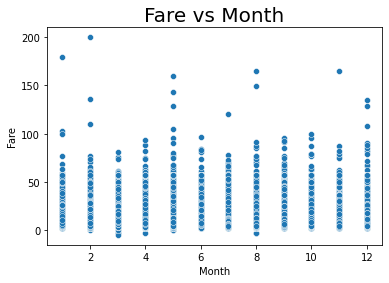

In [36]:
sns.scatterplot(x=df_1['Month'],y=df_1['Fare'])
plt.title('Fare vs Month',size=20)
plt.show()

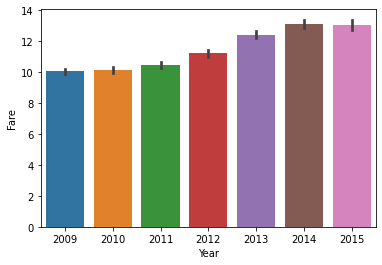

In [37]:
sns.barplot(x=df_1['Year'],y=df_1['Fare'])
plt.show()

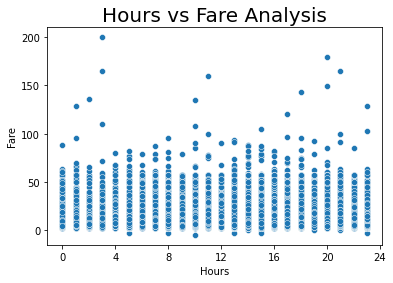

In [38]:
sns.scatterplot(x=df_1['Hours'],y=df_1['Fare'])
plt.title('Hours vs Fare Analysis',size=20)
plt.xticks([0,4,8,12,16,20,24])
plt.show()

<AxesSubplot:xlabel='PassengerInTaxi', ylabel='Fare'>

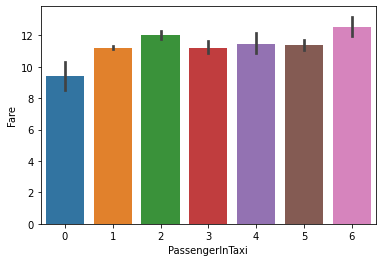

In [39]:
sns.barplot(x=df_1['PassengerInTaxi'],y=df_1['Fare'])

In [40]:
df_1.shape

(50000, 13)

In [41]:
#df_1[df_1['PassengerInTaxi']==0]

In [42]:
#df_5[df_5['Fare']>40]

In [43]:
df_1.head()

,unique_id,Fare,date_time_of_pickup,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,PassengerInTaxi,Year,Month,Day,Week_day,Hours
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7


In [44]:
df_1.isnull().sum()

unique_id              0
Fare                   0
date_time_of_pickup    0
pickup_longitude       0
pickup_latitude        0
dropoff_longitude      0
dropoff_latitude       0
PassengerInTaxi        0
Year                   0
Month                  0
Day                    0
Week_day               0
Hours                  0
dtype: int64

In [45]:
df_1.dtypes

unique_id                           object
Fare                               float64
date_time_of_pickup    datetime64[ns, UTC]
pickup_longitude                   float64
pickup_latitude                    float64
dropoff_longitude                  float64
dropoff_latitude                   float64
PassengerInTaxi                      int64
Year                                 int64
Month                                int64
Day                                  int64
Week_day                             int64
Hours                                int64
dtype: object

In [46]:
df_1.dropna(axis=1,inplace=True)

In [47]:
df_1.shape

(50000, 13)

In [48]:
# Splitting it into Independent and Dependent Variables
#Independent Variables
X=df_1.drop(['Fare','unique_id','date_time_of_pickup'],axis=1)
#dependent variables
y=df_1['Fare'].values
print(X.shape)
print(y.shape)

(50000, 10)
(50000,)


In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(40000, 10) (40000,)
(10000, 10) (10000,)


MODEL BUILDING PROCESS:-

1. HOW TO CHOOSE THE BEST MACHINE LEARNING MODEL:-

- There is No answer to which machine learning algorithm is the best.We have to try and test 
   all the algorithm available and the model which suit our data with the help of the evaluation     
   Metrics will be best model in that moment.
  
2. WHAT ARE THE PERFORMANCE METRICS IN REGRESSION PROBLEM STATEMENT:-

- R2_SCORE

- ROOT_MEAN_SQUARED_ERROR

- MEAN_SQUARED_ERROR

-  EXPLAINED_VARIANCE_SCORE AND MANY MORE

    Conclusion:-
    The model with highest R2_score and lowest root_mean_squared_error will be chosen as the best model at that moment

3. THE MODEL THAT WE BUILD IN FIRST PLACE ARE THE BASE MODEL DO THEY ARE SUFFICIENT?

- The Answer is No

- The process to optimize and tuned the model is called as Hyperparameter Tuning


    Conclusion:-
    
    Hyperparamter Tuning is not a easily approach.We have to try and test different paramters.
    
4. HOW TO SAVE AND LOAD MODELS:-

- using Pickle Approach

- using Joblib Approach



5. THREE THING TO CONSIDER WHEN WE ARE TRAINING AND TESTING THE MODEL

- OVERFITTING

- Low Bias High Variance

- UNDERFITTING

- High Bias High Variance

- SUITABLE MODEL

- Low Bias Low Variance

Where to use which Metric to determine the Performance of a Machine Learning Model?

MAE: It is not very sensitive to outliers in comparison to MSE since it doesn't punish huge errors. It is usually used when the performance is measured on continuous variable data. It gives a linear value, which averages the weighted individual differences equally. The lower the value, better is the model's performance.

MSE: It is one of the most commonly used metrics, but least useful when a single bad prediction would ruin the entire model's predicting abilities, i.e when the dataset contains a lot of noise. It is most useful when the dataset contains outliers, or unexpected values (too high or too low values).

RMSE: In RMSE, the errors are squared before they are averaged. This basically implies that RMSE assigns a higher weight to larger errors. This indicates that RMSE is much more useful when large errors are present and they drastically affect the model's performance. It avoids taking the absolute value of the error and this trait is useful in many mathematical calculations. In this metric also, lower the value, better is the performance of the model.

In [50]:
# We will be creating Class for fit,predict and display results of the data(This will save your time)

class Regression:
    def __init__(self,Model):
        self.Model=Model
    
    def fit_data(self,features,targets):
        self.Model=self.Model.fit(features,targets)
        return self.Model
    def predict_data(self,data):
        self.y_predict=self.Model.predict(data)
        
    def result_training_data(self,y_true,y_pred):
        print()
        print('-----RESULTS OF TRAINING DATA----')
        accuracy_train=metrics.r2_score(y_true,self.Model.predict(y_pred))
        print('r2 score =',accuracy_train)
        rmse_train=np.sqrt(metrics.mean_squared_error(y_true,self.Model.predict(y_pred)))
        print('root mean squared error =',rmse_train)
        mae_train=metrics.mean_absolute_error(y_true,self.Model.predict(y_pred))
        print('mean absolute error=',mae_train)
        explained_variance_train=metrics.explained_variance_score(y_true,self.Model.predict(y_pred))
        print('explained variance=',explained_variance_train)
        
    def result_testing_data(self,y_true,y_pred):
        print()
        print('-----RESULT OF TESTING DATA-----')
        accuracy_test=metrics.r2_score(y_true,self.y_predict)
        print('r2 score=',accuracy_test)
        rmse_test=np.sqrt(metrics.mean_squared_error(y_true,self.y_predict))
        print('root mean squared error=',rmse_test)
        mae_test=metrics.mean_absolute_error(y_true,self.y_predict)
        print('mean absolute error=',mae_test)
        explained_variance_test=metrics.explained_variance_score(y_true,self.y_predict)
        print('explained variance=',explained_variance_test)
    
    

In [51]:
decision_model=Regression(DecisionTreeRegressor(random_state=45))
decision_model.fit_data(X_train,y_train)
y_pred=decision_model.predict_data(X_test)
decision_model.result_training_data(y_train,X_train)
decision_model.result_testing_data(y_test,y_pred)


-----RESULTS OF TRAINING DATA----
r2 score = 0.9998944291379823
root mean squared error = 0.09856787001858161
mean absolute error= 0.0010625000000000445
explained variance= 0.9998944291379823

-----RESULT OF TESTING DATA-----
r2 score= 0.5649183936035325
root mean squared error= 6.626343529428579
mean absolute error= 3.0394010000000002
explained variance= 0.5649288308528038


In [52]:
class Tuned_Model:
    def __init__(self,Model):
        self.Model=Model
        
    def params(self,param_grid):
        self.param_grid=param_grid
        return self.param_grid
    
    def fit_data(self,features,targets):

        self.Model=GridSearchCV(self.Model,param_grid=self.param_grid,cv=5,scoring='r2',verbose=3,n_jobs=-1)
        self.Model=self.Model.fit(features,targets)
    
    def predict_data(self,data):
        self.y_pred=self.Model.predict(data)
        
    def result_training_data(self,y_true,y_pred):
        print()
        print('-----RESULTS OF TRAINING DATA----')
        accuracy_train=metrics.r2_score(y_true,self.Model.predict(y_pred))
        print('r2 score =',accuracy_train)
        rmse_train=np.sqrt(metrics.mean_squared_error(y_true,self.Model.predict(y_pred)))
        print('root mean squared error =',rmse_train)
        mae_train=metrics.mean_absolute_error(y_true,self.Model.predict(y_pred))
        print('mean absolute error=',mae_train)
        explained_variance_train=metrics.explained_variance_score(y_true,self.Model.predict(y_pred))
        print('explained variance=',explained_variance_train)
        
    def result_testing_data(self,y_true,y_pred):
        print()
        print('-----RESULT OF TESTING DATA-----')
        accuracy_test=metrics.r2_score(y_true,self.y_pred)
        print('r2 score=',accuracy_test)
        rmse_test=np.sqrt(metrics.mean_squared_error(y_true,self.y_pred))
        print('root mean squared error=',rmse_test)
        mae_test=metrics.mean_absolute_error(y_true,self.y_pred)
        print('mean absolute error=',mae_test)
        explained_variance_test=metrics.explained_variance_score(y_true,self.y_pred)
        print('explained variance=',explained_variance_test)

In [53]:
decision_tuning=Tuned_Model(DecisionTreeRegressor())
decision_tuning.params({
    'max_features':['auto', 'sqrt', 'log2'],
    'ccp_alpha':[0.1,0.2,0.3],
    'max_depth':np.arange(2,15,1)
})
decision_tuning.fit_data(X_train,y_train)
y_pred_grid=decision_tuning.predict_data(X_test)
decision_tuning.result_training_data(y_train,X_train)
decision_tuning.result_testing_data(y_test,y_pred_grid)

Fitting 5 folds for each of 117 candidates, totalling 585 fits

-----RESULTS OF TRAINING DATA----
r2 score = 0.721964069875274
root mean squared error = 5.058407344291272
mean absolute error= 3.3275075922421653
explained variance= 0.7219640698752738

-----RESULT OF TESTING DATA-----
r2 score= 0.6309219696575525
root mean squared error= 6.10306060587118
mean absolute error= 3.485394030003434
explained variance= 0.6310382288424703


In [54]:
rf_model=Tuned_Model(RandomForestRegressor(random_state=45))
rf_model.params({
    'ccp_alpha':[0.1,0.2],
    'max_depth':np.arange(2,10,1)
})
rf_model.fit_data(X_train,y_train)
y_pred_rf=rf_model.predict_data(X_test)
rf_model.result_training_data(y_train,X_train)
rf_model.result_testing_data(y_test,y_pred_rf)

Fitting 5 folds for each of 16 candidates, totalling 80 fits

-----RESULTS OF TRAINING DATA----
r2 score = 0.7167881844641546
root mean squared error = 5.105273605138803
mean absolute error= 3.394876005459725
explained variance= 0.7167886204252432

-----RESULT OF TESTING DATA-----
r2 score= 0.636514813099403
root mean squared error= 6.056642559262063
mean absolute error= 3.552928505531567
explained variance= 0.636646355814363


In [55]:
gradient_model=Regression(GradientBoostingRegressor(random_state=45))
gradient_model.fit_data(X_train,y_train)
y_pred=gradient_model.predict_data(X_test)
gradient_model.result_training_data(y_train,X_train)
gradient_model.result_testing_data(y_test,y_pred)


-----RESULTS OF TRAINING DATA----
r2 score = 0.7579266425588889
root mean squared error = 4.7199438792492
mean absolute error= 2.8905539891869334
explained variance= 0.7579266425588889

-----RESULT OF TESTING DATA-----
r2 score= 0.6981701460563012
root mean squared error= 5.519118036564328
mean absolute error= 3.011548539731199
explained variance= 0.6982801060740921


In [56]:
gradient_model_grid=Tuned_Model(GradientBoostingRegressor(random_state=45))
gradient_model_grid.params({
    'ccp_alpha':[0.1,0.2],
    'max_depth':[4,5,6,7,8,9,10,11,12]
})
gradient_model_grid.fit_data(X_train,y_train)
y_pred_g=gradient_model_grid.predict_data(X_test)
gradient_model_grid.result_training_data(y_train,X_train)
gradient_model_grid.result_testing_data(y_test,y_pred_g)

Fitting 5 folds for each of 18 candidates, totalling 90 fits

-----RESULTS OF TRAINING DATA----
r2 score = 0.749802180720901
root mean squared error = 4.798495568259134
mean absolute error= 3.072401115284441
explained variance= 0.749802180720901

-----RESULT OF TESTING DATA-----
r2 score= 0.6733365223078356
root mean squared error= 5.7416785700923265
mean absolute error= 3.2074570693478117
explained variance= 0.6734246188948758


Using Different Techniques of HyperParameter Tuning Techniques:-[In this UseCase We Will Use Hyperopt
and TPOT]

1. HyperOpt

2. TPOT

3. Skopt

4. Optuna


In [78]:
from hyperopt import hp,tpe,fmin,STATUS_OK,Trials

In [124]:
space = {
        'max_depth': hp.quniform('max_depth', 2, 20, 1),
        'ccp_alpha':hp.quniform('ccp_alpha',0.01,0.5,0.1)
}

In [125]:
space

{'max_depth': <hyperopt.pyll.base.Apply at 0x1d6e9121198>,
 'ccp_alpha': <hyperopt.pyll.base.Apply at 0x1d6e9121208>}

In [86]:
from sklearn.model_selection import cross_val_score
def objective(space):
    model = DecisionTreeRegressor(max_depth=space['max_depth'])
    
    accuracy = cross_val_score(model, X_train, y_train, cv = 5).mean()

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': -accuracy, 'status': STATUS_OK }

In [87]:
trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 80,
            trials= trials)
best

100%|███████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [01:45<00:00,  1.32s/trial, best loss: -0.6330401973119233]


{'max_depth': 9.0}

In [88]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
traineddecision = DecisionTreeRegressor(max_depth=best['max_depth']).fit(X_train,y_train)
predictiondecision=traineddecision.predict(X_test)
r2_score_train=r2_score(y_train,traineddecision.predict(X_train))
print(r2_score_train)
rmse_train=np.sqrt(mean_squared_error(y_train,traineddecision.predict(X_train)))
print(rmse_train)
r2_score_test=r2_score(y_test,predictiondecision)
print(r2_score_test)
rmse_test=np.sqrt(mean_squared_error(y_test,predictiondecision))
print(rmse_test)

0.7463096941352017
4.83187036527398
0.6164929923840117
6.221215388358037


In [111]:
##TPOTRegressor
max_depth =[4,5,6,7,8,9,10,11,12]
ccp_alpha=[0.1,0.2]
param={
    'max_depth':max_depth
}
print(param)

{'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12], 'ccp_alpha': [0.1, 0.2]}


In [92]:
from tpot import TPOTRegressor


tpot_regressor = TPOTRegressor(generations= 10, population_size= 24, offspring_size= 12,
                                 verbosity= 2, early_stop= 12,
                                 config_dict={'sklearn.tree.DecisionTreeRegressor': param}, 
                                 cv = 4, scoring = 'neg_mean_squared_error',random_state=1)
tpot_regressor.fit(X_train,y_train)

Optimization Progress:   0%|          | 0/144 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -32.17384068832311

Generation 2 - Current best internal CV score: -32.17384068832311

Generation 3 - Current best internal CV score: -31.565362585637114

Generation 4 - Current best internal CV score: -31.565362585637114

Generation 5 - Current best internal CV score: -31.565362585637114

Generation 6 - Current best internal CV score: -31.125961157521537

Generation 7 - Current best internal CV score: -31.125961157521537

Generation 8 - Current best internal CV score: -30.926046492858802

Generation 9 - Current best internal CV score: -30.926046492858802

Generation 10 - Current best internal CV score: -30.926046492858802

Best pipeline: DecisionTreeRegressor(DecisionTreeRegressor(DecisionTreeRegressor(DecisionTreeRegressor(DecisionTreeRegressor(CombineDFs(input_matrix, input_matrix), max_depth=4), max_depth=8), max_depth=6), max_depth=7), max_depth=10)


TPOTRegressor(config_dict={'sklearn.tree.DecisionTreeRegressor': {'max_depth': [4,
                                                                                5,
                                                                                6,
                                                                                7,
                                                                                8,
                                                                                9,
                                                                                10]}},
              cv=4, early_stop=12, generations=10, offspring_size=12,
              population_size=24, random_state=1,
              scoring='neg_mean_squared_error', verbosity=2)

In [93]:
tpot_pred=tpot_regressor.predict(X_test)
r2_score_train=r2_score(y_train,tpot_regressor.predict(X_train))
print(r2_score_train)
rmse_train=np.sqrt(mean_squared_error(y_train,tpot_regressor.predict(X_train)))
print(rmse_train)
r2_score_test=r2_score(y_test,tpot_pred)
print(r2_score_test)
rmse_test=np.sqrt(mean_squared_error(y_test,tpot_pred))
print(rmse_test)

0.8483440727041489
3.735880985889508
0.5995169302992955
6.357416520493936


In [130]:
def objective_gradient(space):
    model = GradientBoostingRegressor(max_depth=space['max_depth'],ccp_alpha=space['ccp_alpha'])
    
    accuracy = cross_val_score(model, X_train, y_train, cv = 5).mean()

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': -accuracy, 'status': STATUS_OK }

In [131]:
space

{'max_depth': <hyperopt.pyll.base.Apply at 0x1d6e9121198>,
 'ccp_alpha': <hyperopt.pyll.base.Apply at 0x1d6e9121208>}

# Save the Model

In [136]:
import pickle
PKL_Filename='taxifaremodel.pkl'
with open(PKL_Filename,'wb') as file:
    pickle.dump(gradient_model_grid,file)